## Task 1: Exploratory Data Analysis on Financial News

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import os

In [ ]:

# Add src directory to path
sys.path.append(str(Path.cwd().parent / "src"))
from plot_utils import save_plot  # Custom plot saving function

In [ ]:
# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

In [ ]:
# Set paths
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data"
PLOTS_DIR = BASE_DIR / "plots"

In [42]:
#Load the data
news_df = pd.read_csv(r"C:\Users\jilow\OneDrive\Documents\FIndata\raw_analyst_ratings.csv")


In [45]:
print("\n Dataset Info:")
news_df.head()



 Dataset Info:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [46]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [ ]:
# Data Preparation
# Parse dates and add features
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df['headline_length'] = news_df['headline'].str.len()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


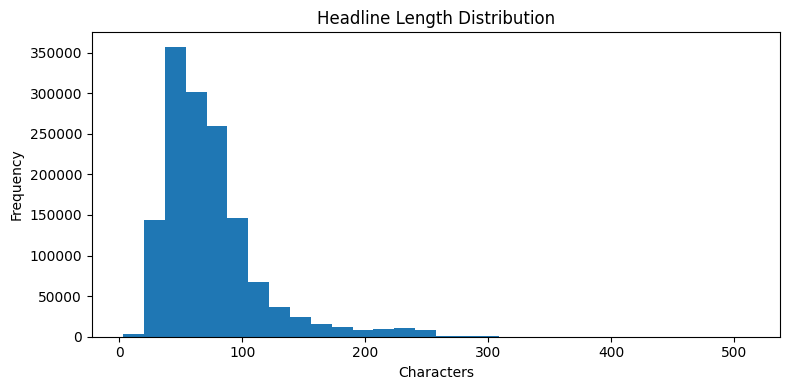

In [48]:
# Descriptive statistics of headline lengths
print(news_df['headline_length'].describe())
plt.figure(figsize=(8,4))
plt.hist(news_df['headline_length'].dropna(), bins=30)
plt.title("Headline Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [49]:
# Publisher analysis
publisher_counts = news_df['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'count']
publisher_counts.head(10)

,publisher,count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


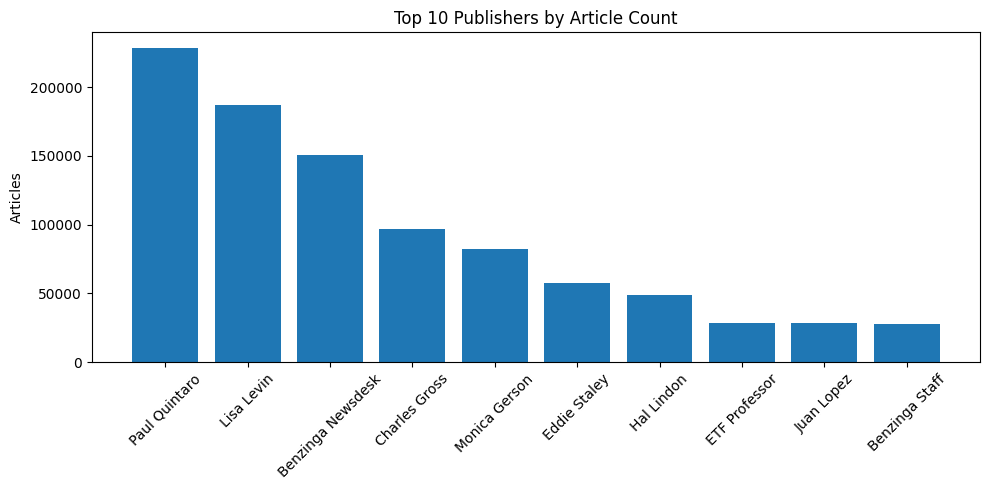

In [50]:
plt.figure(figsize=(10,5))
plt.bar(publisher_counts['publisher'][:10], publisher_counts['count'][:10])
plt.xticks(rotation=45)
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Articles")
plt.tight_layout()
plt.show()

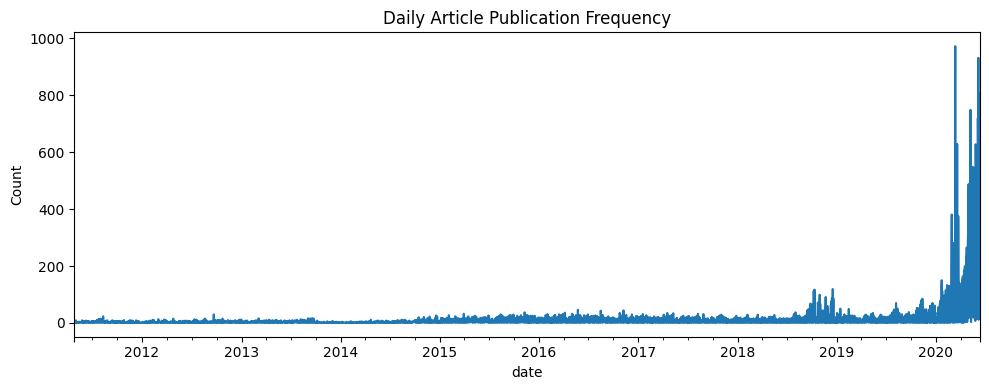

In [51]:
# Daily publication trend
daily_counts = news_df.set_index('date').resample('D').size()
plt.figure(figsize=(10,4))
daily_counts.plot()
plt.title("Daily Article Publication Frequency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

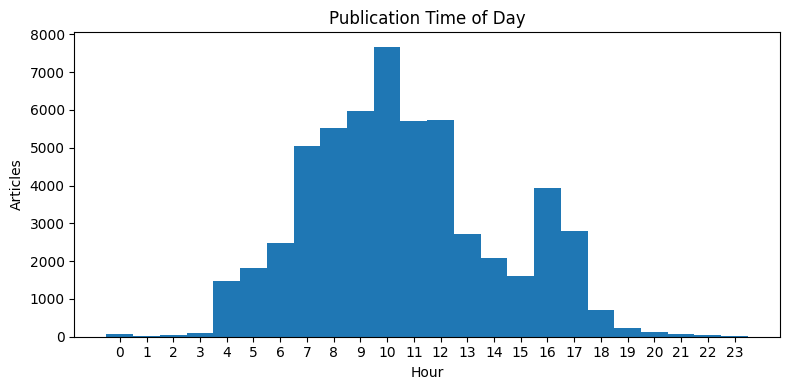

In [52]:
# Time-of-day publication analysis
plt.figure(figsize=(8,4))
news_df['hour'] = news_df['date'].dt.hour
plt.hist(news_df['hour'].dropna(), bins=24, range=(0,24), align='left')
plt.xticks(range(24))
plt.title("Publication Time of Day")
plt.xlabel("Hour")
plt.ylabel("Articles")
plt.tight_layout()
plt.show()

In [53]:
# Publisher domain analysis
news_df['publisher_domain'] = news_df['publisher'].apply(lambda x: str(x).split('@')[-1] if '@' in str(x) else x)
domain_counts = news_df['publisher_domain'].value_counts().reset_index()
domain_counts.columns = ['domain', 'count']
print(domain_counts.head(10))

              domain   count
0      Paul Quintaro  228373
1         Lisa Levin  186979
2  Benzinga Newsdesk  150484
3      Charles Gross   96732
4      Monica Gerson   82380
5       Eddie Staley   57254
6         Hal Lindon   49047
7      ETF Professor   28489
8         Juan Lopez   28438
9     Benzinga Staff   28114


In [54]:
# Text analysis
nltk_stopwords = stopwords.words('english')
cv = CountVectorizer(stop_words=nltk_stopwords, max_features=20)
X = cv.fit_transform(news_df['headline'].fillna(''))
terms = cv.get_feature_names_out()
counts = X.toarray().sum(axis=0)
keywords_df = pd.DataFrame({'term': terms, 'count': counts})
print(keywords_df.sort_values('count', ascending=False).head(10))


        term   count
18        vs  162099
14    stocks  161776
6        est  140604
5        eps  128897
7     market  120558
13    shares  114313
11   reports  108710
17    update   91723
4   earnings   87399
12     sales   79645
